# Assignment-07 Clustering(Airlines)

# Problem Statement
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Draw the inferences from the clusters obtained.

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [57]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID           
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


# Hierarchical (Airlines)

In [5]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [58]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data)
data_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                         
1     0.016508         0.0       0.00        0.0        0.0     0.000660   
2     0.011288         0.0       0.00        0.0        0.0     0.000815   
3     0.024257         0.0       0.00        0.0        0.0     0.015636   
4     0.008667         0.0       0.00        0.0        0.0     0.001896   
5     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
4017  0.010837         0.0       0.00        0.0        0.0     0.032330   
4018  0.037766         0.0       0.00        0.0        0.0     0.003720   
4019  0.043169         0.0       0.50        0.0        0.0     0.096505   
4020  0.032202         0.0       0.00        0.0        0.0     0.001896   
4021  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1        0.011628           0.000000         0.000000           0.843742   
2        0.023256           0.000000         0.000000           0.839884   
3        0.046512           0.000000         0.000000           0.847842   
4        0.011628           0.000000         0.000000           0.837955   
5        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
4017     0.046512           0.006490         0.018868           0.168917   
4018     0.058140           0.000000         0.000000           0.167953   
4019     0.093023           0.000000         0.000000           0.168797   
4020     0.011628           0.016225         0.018868           0.168676   
4021     0.000000           0.000000         0.000000           0.168314   

      Award  
ID           
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       1.0  
...     ...  
4017    1.0  
4018    1.0  
4019    1.0  
4020    0.0  
4021    0.0  

[3999 rows x 11 columns]

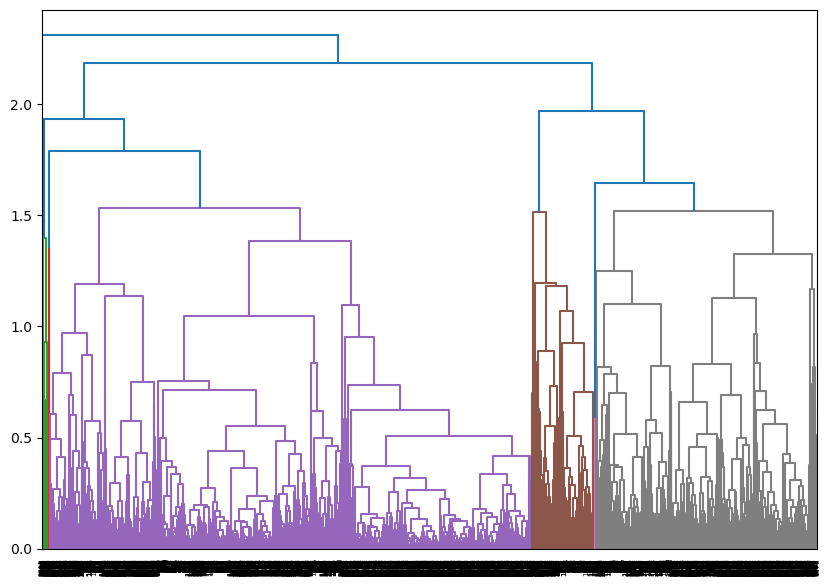

In [7]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data_norm,'complete'))

In [24]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [27]:
y=pd.DataFrame(hclusters.fit_predict(data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [29]:
# Adding clusters to dataset
data['clustersid']=hclusters.labels_
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  clustersid  
ID                       
1         0           1  
2         0           1  
3         0           1  
4         0           1  
5         1           3  
...     ...         ...  
4017      1           0  
4018      1           0  
4019      1           0  
4020      0           4  
4021      0           4  

[3999 rows x 12 columns]

In [30]:
data.groupby('clustersid').agg(['mean']).reset_index()

clustersid        Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean        mean      mean      mean      mean   
0          0   79848.233615  285.097252  1.699789  1.024313  1.000000   
1          1   43313.653808   21.506429  1.000000  1.033630  1.000989   
2          2  106221.111386  161.262376  3.198020  1.001238  1.025990   
3          3  127475.028037  160.801869  4.362617  1.000000  1.050467   
4          4   30013.416309   98.054363  1.000000  1.000000  1.000000   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0  12079.774841   12.133192        781.939746        2.369979   
1   2562.614243    5.474777        169.510386        0.523244   
2  26458.257426   16.363861        198.733911        0.558168   
3  58656.919626   22.235514        991.110280        3.005607   
4   2552.569385    6.101574        340.274678        0.948498   

  Days_since_enroll Award  
               mean  mean  
0       4372.173362   1.0  
1       4940.680514   0.0  
2       4367.250000   0.0  
3       5072.226168   1.0  
4       1568.864092   0.0

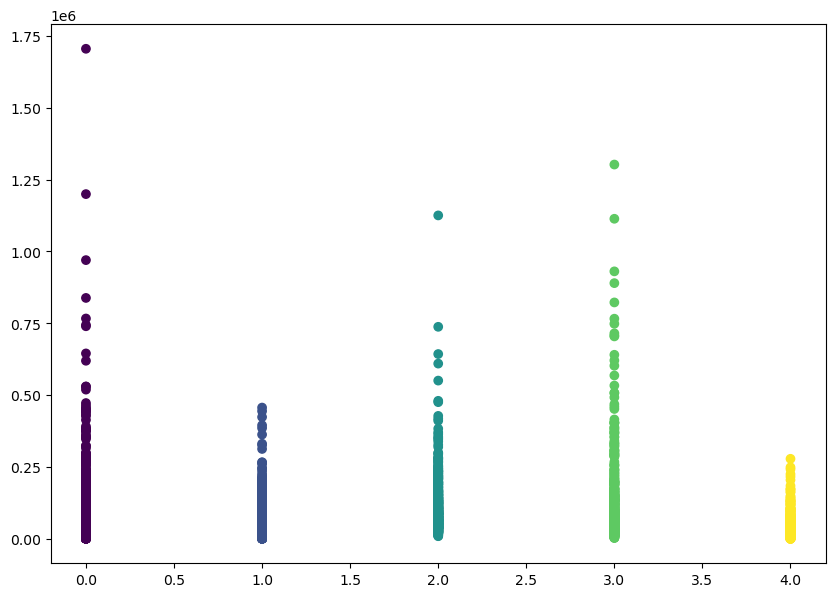

In [31]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['Balance'], c=hclusters.labels_) 

# DB_Scan Clustering (Airlines)

In [9]:
data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [10]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:>

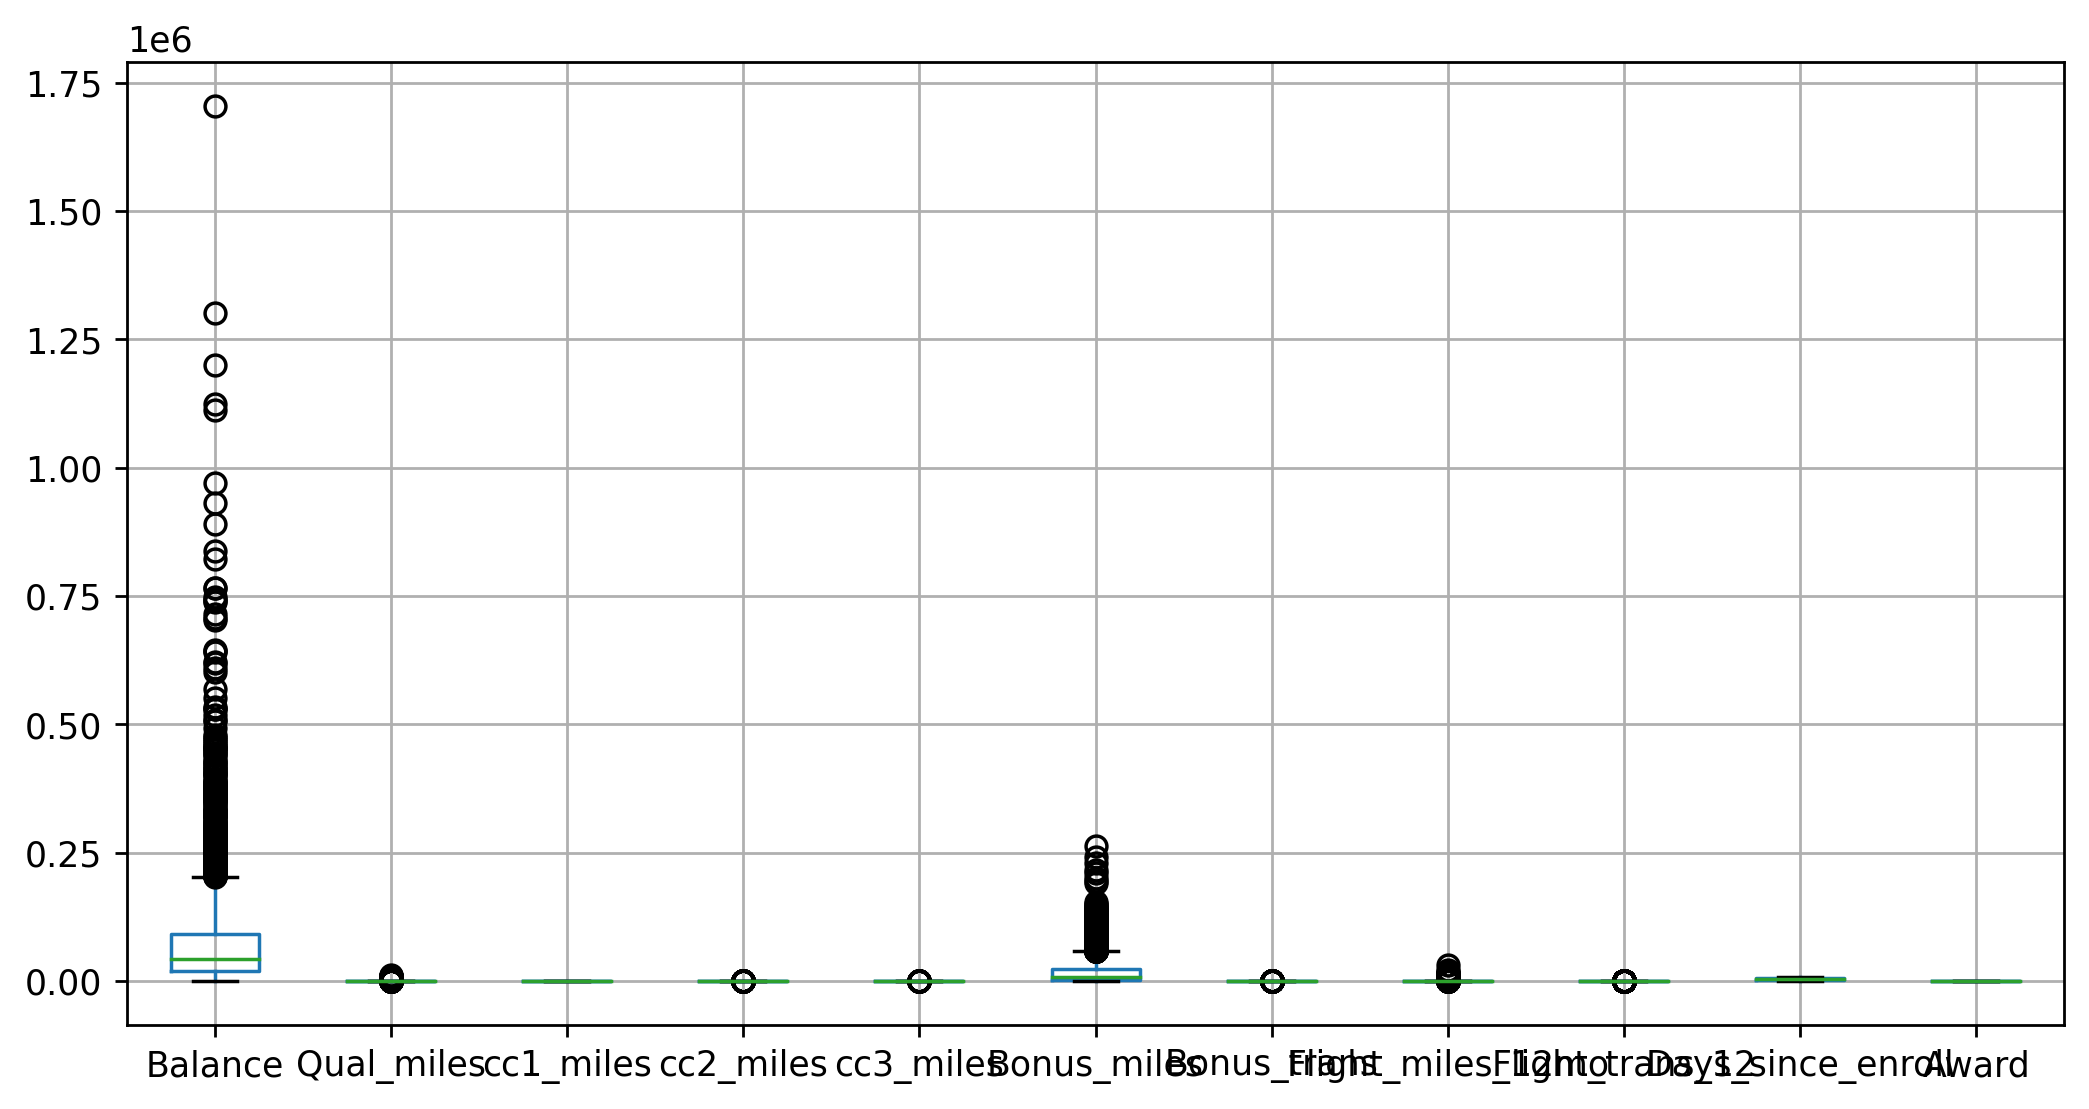

In [11]:
data.boxplot()

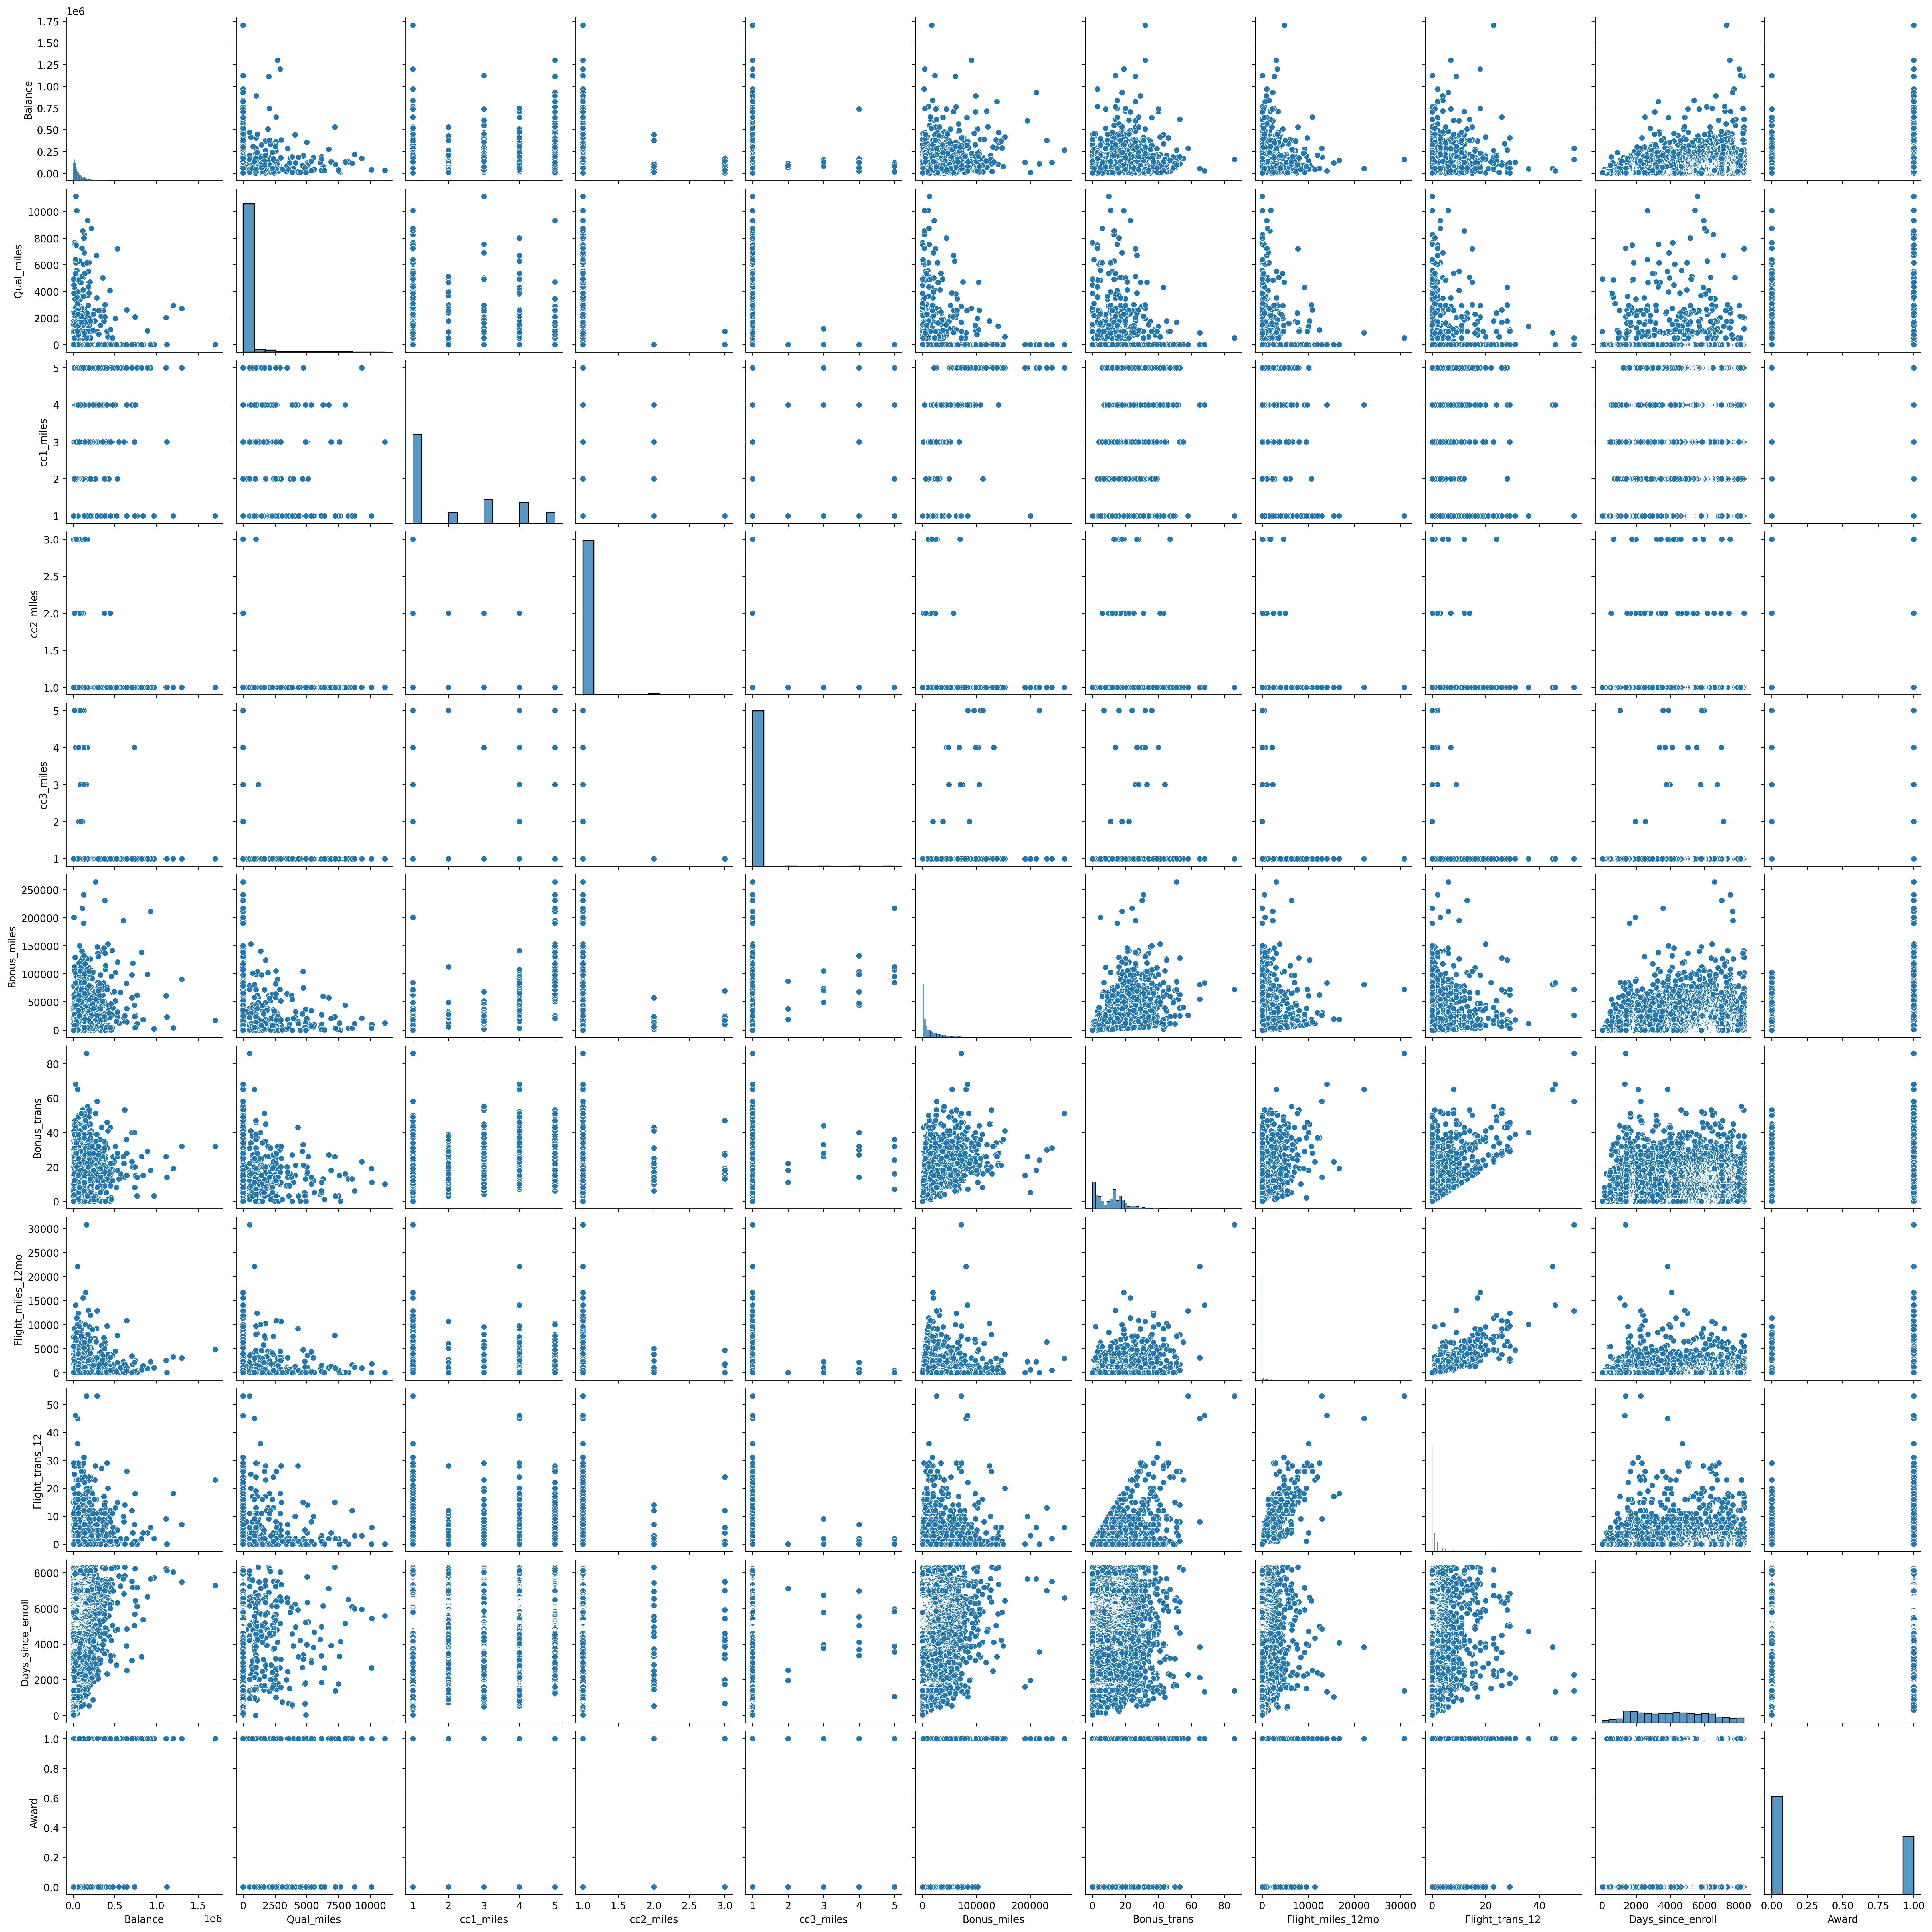

In [13]:
import seaborn as sns

sns.pairplot(data)

In [19]:
sc = StandardScaler()

x = sc.fit_transform(data)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [21]:
from sklearn.cluster import DBSCAN

In [46]:
db = DBSCAN()
db.fit(x)

DBSCAN()

In [48]:
#Noisy samples are given the label -1.
db.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [24]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(x,db.labels_)

-0.07834757831741164

In [49]:
db  =DBSCAN(eps=2, min_samples=3)

db.fit_predict(x)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
silhouette_score(x,db.labels_)

0.258497793273823

In [35]:
data['Y'] = db.labels_

In [36]:
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  Y  
ID              
1         0  0  
2         0  0  
3         0  0  
4         0  0  
5         1  1  
...     ... ..  
4017      1  1  
4018      1  1  
4019      1  1  
4020      0  0  
4021      0  0  

[3999 rows x 12 columns]

In [38]:
data[data['Y']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
9      443003           0          3          2          1         1753   
51     108137           0          1          1          1         6368   
66      53914           0          3          1          1        33767   
72      84409        5031          2          1          1        15436   
90     609477           0          3          1          1        21422   
...       ...         ...        ...        ...        ...          ...   
3869    97510        1678          5          1          1        71609   
3906   126167           0          5          1          1       190160   
3934    55922        2273          1          1          1         8104   
3940   130748           0          4          1          1        65510   
3957    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
9              43               3850               12               6948   
51              5               6368                5               6844   
66             45               5550               29               6826   
72             16               1150                4               7766   
90             22               1200                8               6820   
...           ...                ...              ...                ...   
3869           51               7650               26               1665   
3906           15                  0                0               1612   
3934           19               4104               16               1552   
3940           37               6349                7               1545   
3957            2               9577                1               1515   

      Award  Y  
ID              
9         1 -1  
51        0 -1  
66        1 -1  
72        0 -1  
90        0 -1  
...     ... ..  
3869      1 -1  
3906      1 -1  
3934      0 -1  
3940      0 -1  
3957      0 -1  

[141 rows x 12 columns]

In [42]:
data.groupby('Y').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Y                                                                  
-1   267601.354610  1746.205674   3.000000    1.06383   1.347518   
 0    57970.120619    62.784026   1.697637    1.00000   1.000000   
 1    80686.144874   108.636701   2.658990    1.00000   1.000000   
 2    40618.000000     0.000000   1.000000    2.00000   1.000000   
 3    51096.000000     0.000000   1.000000    3.00000   1.000000   
 4    73323.400000   117.800000   1.000000    1.00000   1.000000   
 5    39218.500000     0.000000   1.000000    2.00000   1.000000   
 6    52906.000000  4062.333333   4.333333    1.00000   1.000000   
 7    20111.500000     0.000000   1.000000    3.00000   1.000000   
 8   106247.500000   273.500000   1.000000    1.00000   1.000000   
 9   781291.333333     0.000000   1.000000    1.00000   1.000000   
 10  164878.000000     0.000000   1.000000    1.00000   1.000000   
 11  110616.000000  5310.666667   1.000000    1.00000   1.000000   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Y                                                                    
-1   58378.815603    28.205674        3940.184397        10.787234   
 0    9815.497148     8.915648         191.209046         0.563977   
 1   26317.071322    14.537890         530.512630         1.650074   
 2    8444.142857    14.285714         250.000000         0.714286   
 3   15561.666667    14.333333          44.444444         0.222222   
 4   12311.200000    30.000000        3734.600000        24.800000   
 5    9189.250000    13.500000         209.375000         0.812500   
 6   54419.000000    15.666667         366.666667         1.000000   
 7   18085.500000    20.000000         950.000000         2.500000   
 8    8641.000000    19.250000        6991.000000        18.000000   
 9   17995.000000     8.666667         723.333333         2.000000   
 10  17867.500000    27.000000        7655.000000        25.000000   
 11   5817.666667    13.000000        3691.000000        10.666667   

     Days_since_enroll     Award  
Y                                 
-1         4902.539007  0.751773  
 0         3816.730644  0.000000  
 1         4579.668648  1.000000  
 2         4612.285714  1.000000  
 3         3603.444444  0.000000  
 4         4324.800000  1.000000  
 5         3511.187500  0.000000  
 6         5946.666667  1.000000  
 7         5325.750000  1.000000  
 8         5112.000000  0.000000  
 9         6071.000000  1.000000  
 10        3707.250000  1.000000  
 11        4405.666667  1.000000

# K-Means Clustering (Airlines)

In [52]:
# Normalize heterogenous numerical data by using Standard Scaler
data_norm=StandardScaler().fit_transform(data)

In [53]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [55]:
from sklearn.cluster import KMeans

In [59]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

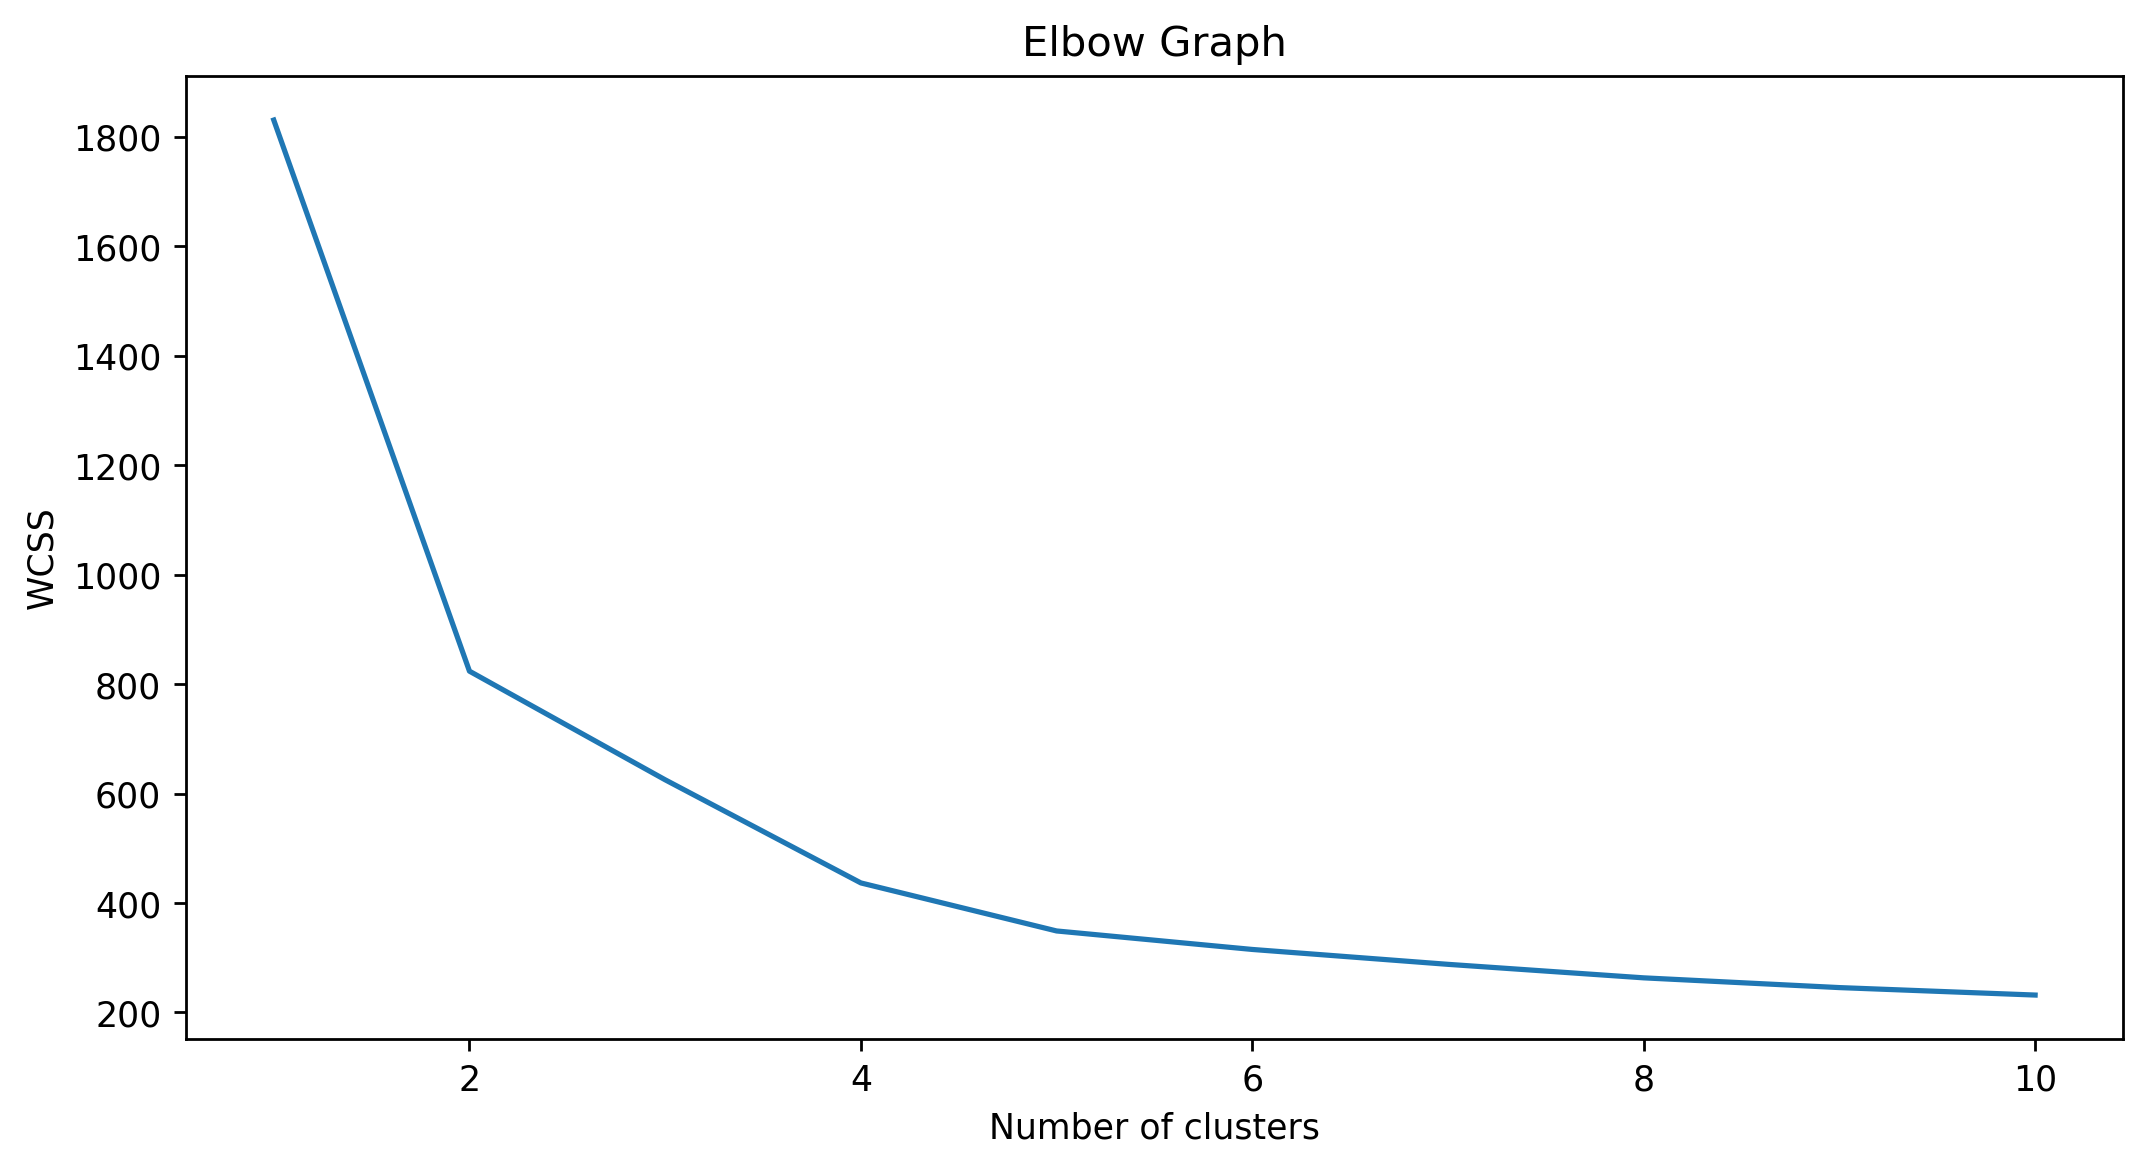

In [60]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build Cluster algorithm using K=4

In [61]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(data_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [62]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [63]:
# Assign clusters to the data set
data=data_norm.copy()
data['clusters4id']=clusters4.labels_
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                         
1     0.016508         0.0       0.00        0.0        0.0     0.000660   
2     0.011288         0.0       0.00        0.0        0.0     0.000815   
3     0.024257         0.0       0.00        0.0        0.0     0.015636   
4     0.008667         0.0       0.00        0.0        0.0     0.001896   
5     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
4017  0.010837         0.0       0.00        0.0        0.0     0.032330   
4018  0.037766         0.0       0.00        0.0        0.0     0.003720   
4019  0.043169         0.0       0.50        0.0        0.0     0.096505   
4020  0.032202         0.0       0.00        0.0        0.0     0.001896   
4021  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1        0.011628           0.000000         0.000000           0.843742   
2        0.023256           0.000000         0.000000           0.839884   
3        0.046512           0.000000         0.000000           0.847842   
4        0.011628           0.000000         0.000000           0.837955   
5        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
4017     0.046512           0.006490         0.018868           0.168917   
4018     0.058140           0.000000         0.000000           0.167953   
4019     0.093023           0.000000         0.000000           0.168797   
4020     0.011628           0.016225         0.018868           0.168676   
4021     0.000000           0.000000         0.000000           0.168314   

      Award  clusters4id  
ID                        
1       0.0            0  
2       0.0            0  
3       0.0            0  
4       0.0            0  
5       1.0            3  
...     ...          ...  
4017    1.0            1  
4018    1.0            1  
4019    1.0            3  
4020    0.0            0  
4021    0.0            0  

[3999 rows x 12 columns]

In [64]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.27515792e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.88578059e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [66]:
# Group data by Clusters (K=4)
data.groupby('clusters4id').agg(['mean']).reset_index()

clusters4id   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0           0  0.023901   0.008284  0.023195  0.008962  0.001054    0.012648   
1           1  0.048995   0.026054  0.039004  0.016345  0.002229    0.033564   
2           2  0.069234   0.006558  0.644122  0.000805  0.005636    0.118637   
3           3  0.063535   0.017791  0.728960  0.000619  0.006498    0.172970   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll Award  
         mean              mean            mean              mean  mean  
0    0.075450          0.007353        0.012433          0.436112   0.0  
1    0.121825          0.033427        0.059407          0.522892   1.0  
2    0.200595          0.007313        0.011941          0.534640   0.0  
3    0.234904          0.023160        0.040421          0.586139   1.0

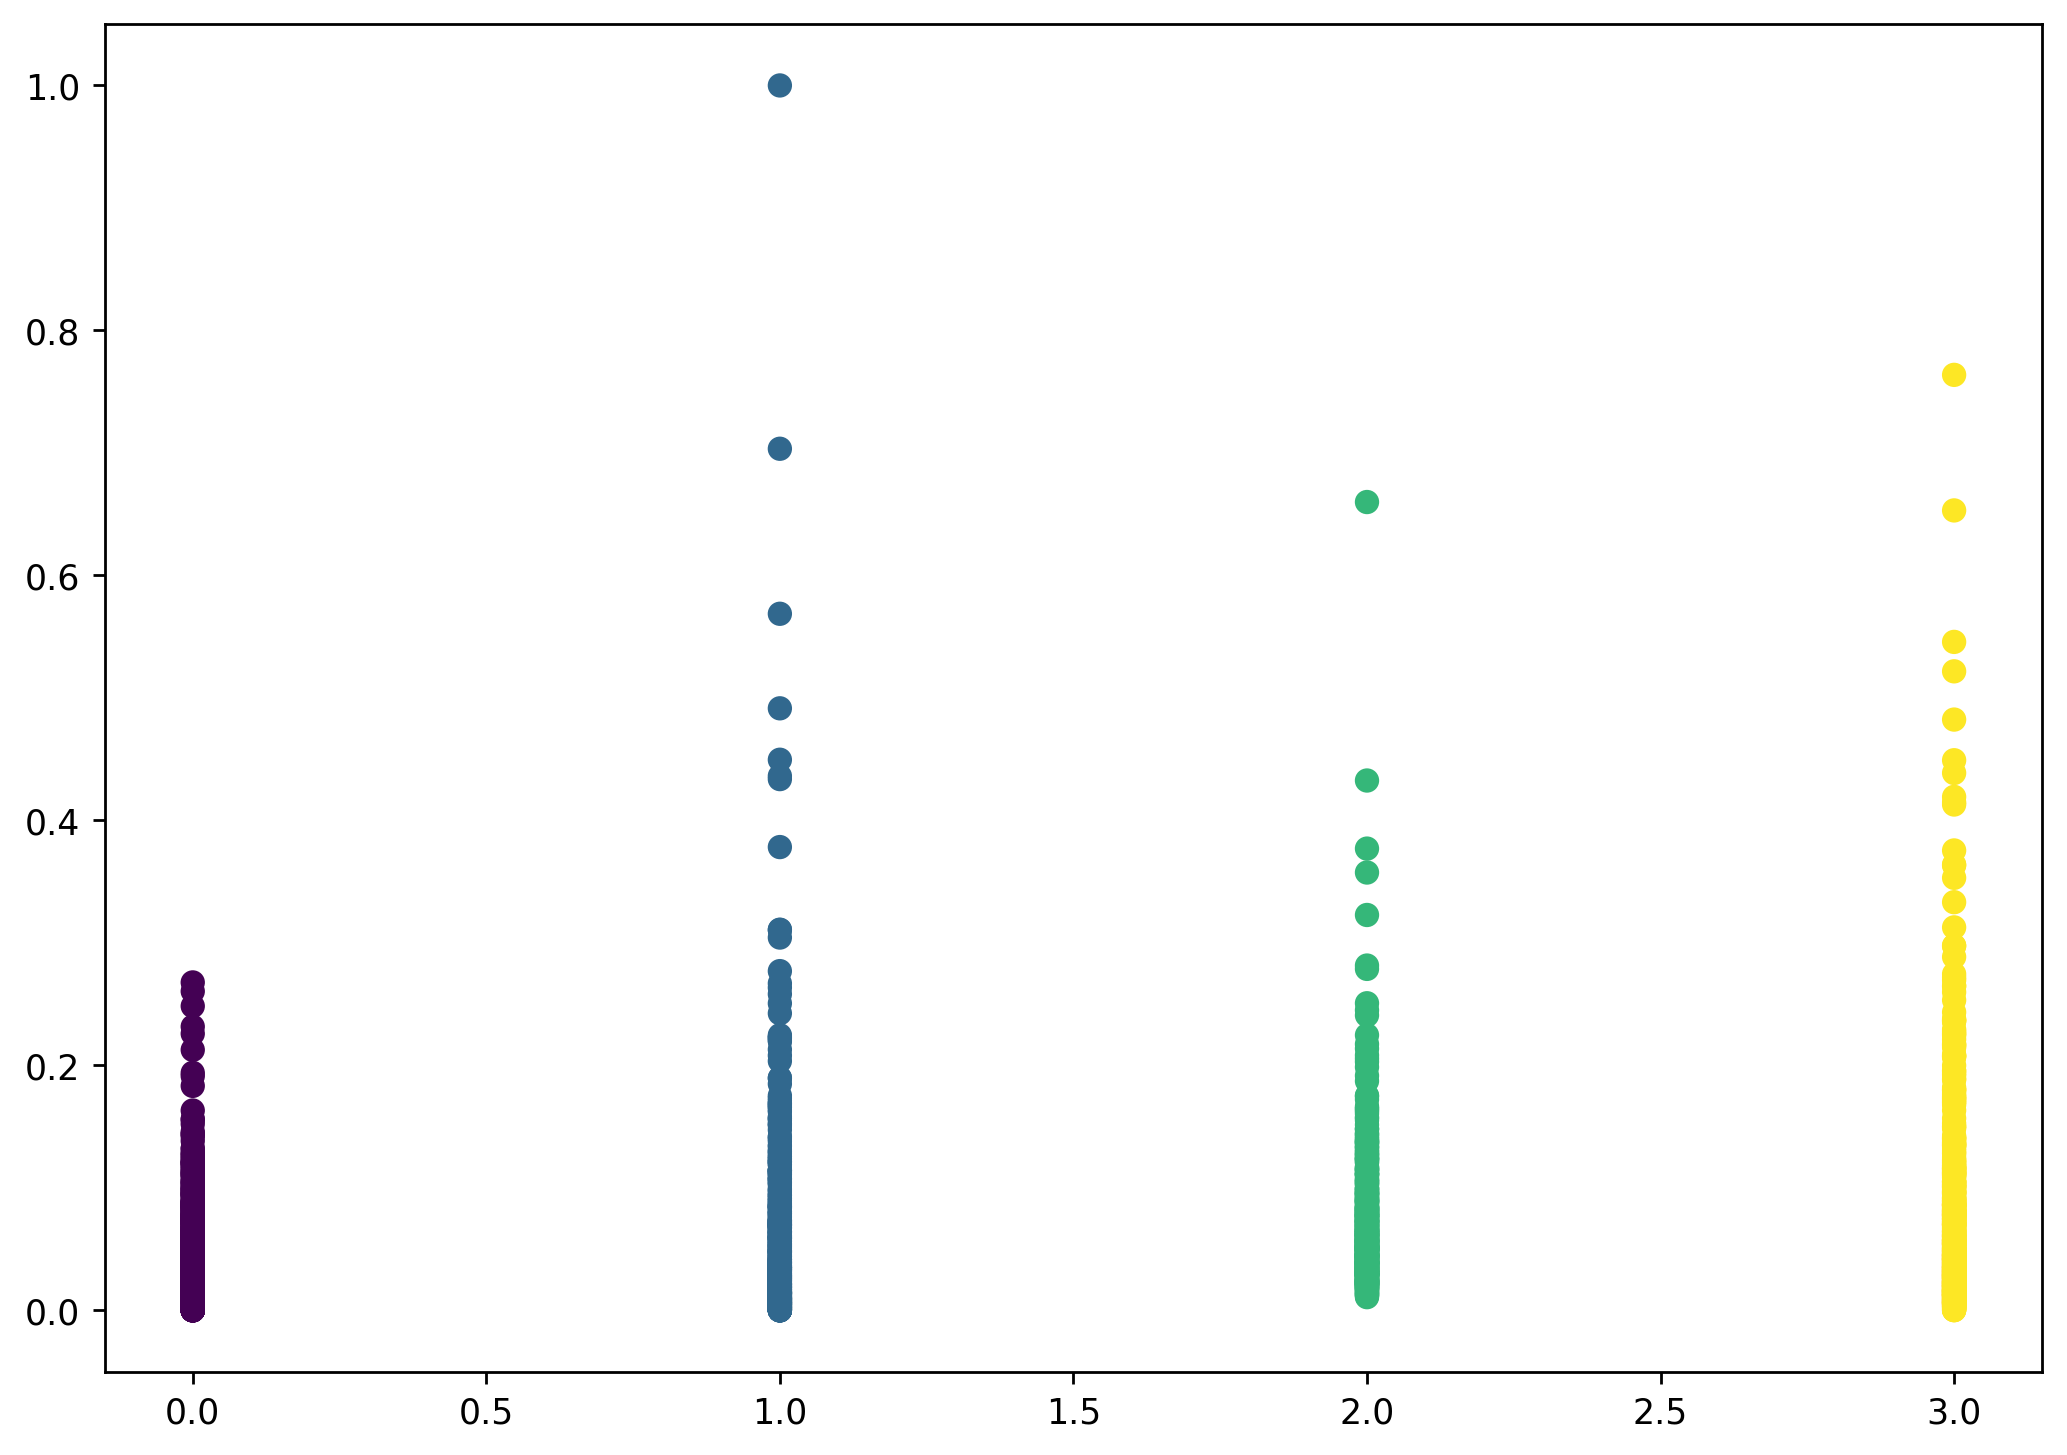

In [67]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters4id'],data['Balance'], c=clusters4.labels_) 